# Project: Wrangling and Analyze Data

## Data Gathering
In this phase, we are going to gather datasets from **all** 3 different sources in the following steps:
- Import required libraries
- Locally read the downloaded dataset `twitter-archive-enhanced.csv`
- Use the Requests library to download the tweet image prediction `image_predictions.tsv` and then load it 
- Use the Tweepy library to query additional data via the Twitter API `tweet_json.txt`and load it

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from io import BytesIO

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#importing my first dataset from my local file
tweets=pd.read_csv('twitter-archive-enhanced.csv')
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#getting second dataset from web scraping

url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)
    
    
#read image file now downloaded into dataframe called image_df
image_tweets = pd.read_csv('image-predictions.tsv', sep='\t')
image_tweets.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#getting third dataset from twitter API
#authenticating user
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = tweets.tweet_id.values #getting ids from the tweets dataframe
len(tweet_ids)

2356

In [ ]:
#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
#Loading the twitter data
tweets_data_path='tweet_json.txt'
#Initializing an empty data list, `tweets_data`
tweets_data=[]
with open(tweets_data_path, 'r') as tweets_file:
    for line in tweets_file:
        tweet=(json.loads(line))
        tweet_id= tweet['id']
        timestamp= tweet['created_at']
        retweet_count= tweet['retweet_count']
        favorite_count= tweet['favorite_count']
        tweets_data.append({'tweet_id':tweet_id,
                           'timestamp':timestamp,
                            'favorite_count':favorite_count,
                           'retweet_count':retweet_count})
        
#Loading tweets.data to a dataframe
tweets_extra=pd.DataFrame(tweets_data, columns=['tweet_id','timestamp', 'retweet_count', 'favorite_count'])
tweets_extra.head()

,tweet_id,timestamp,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,6975,33711
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5276,29237
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3466,21983
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7197,36811
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,7721,35193


## Assessing Data
In this section, we will detect and document data quality and tidiness issues. We are going to use **both** visual assessment
programmatic assessement to assess the data.




### Visual Assessments

In [6]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- the `source`column is a bit clustered will need some cleaning up
- we don't need the retweeted columns information as we are only concerned with original tweets
- Invalid names such as a. Will investigate further
- the different dog stages should be combined in a column

In [7]:
image_tweets

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


- The different suggestions of dog breed(p1,p1_conf,p1_dog,p2,p2_conf,...) breaches tidy data format- Each variable forms a column. Will fix that
- Identical column with `tweets`-tweet_id

In [8]:
tweets_extra

,tweet_id,timestamp,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,6975,33711
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5276,29237
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3466,21983
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7197,36811
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,7721,35193
...,...,...,...,...
2322,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,36,88
2323,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,115,246
2324,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,36,100
2325,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,39,112


- All 3 datasets should be contained in a table as an observational unit

### Programmatic Assessments

In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- `tweet_id`,`in_reply_to_status_id`,`in_reply_to_user_id` should be a string to avoid statistical calculations on them
- `timestamp`should be datetime

In [10]:
image_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- `tweet_id`should be a string

In [11]:
tweets_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   timestamp       2327 non-null   object
 2   retweet_count   2327 non-null   int64 
 3   favorite_count  2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


- common `tweet_id`issue as the other datasets

In [12]:
# checking if there are complete duplicates
tweets.duplicated().sum()
image_tweets.duplicated().sum()
tweets_extra.duplicated().sum()

0

In [13]:
tweets.tail(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None


- Invalid values in `name`are in lowercases 

In [14]:
#Investigating the 'name' column further
name_lower = tweets.name.str.contains('^[a-z]') #using regular expression
tweets[name_lower].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

- Wow, quite a number of invalid names truly in the lowercase

In [15]:
#Investigating the 'source' column
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

- Truly, the `source`column is clustered. We have to extract the extract the real name sources from the string 

In [16]:
#checking the expanded urls column
tweets[tweets.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


- There are duplicated expanded_urls

In [17]:
#checking for null values in tweets
tweets.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# investigating null values in tweets columns
tweets[tweets.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- From this assessment, the null values in null-contained columns are inconsistent, Nan and None

In [19]:
tweets.rating_numerator.value_counts()
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

> We need to combine these columns together as a column.The inconsistencies in the rating denominator shouldn't be as the denominator should not be greater than 10.

In [20]:
tweets.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


- Seems some rows contain more than a dog stage

In [21]:
tweets.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
image_tweets.jpg_url.duplicated().sum()

66

### Quality issues

1. tweet_id should be a string to avoid statistical calculations on them. DONE
2. timestamp should be datetime. DONE
3. some tweets have several identical expanded_urls in `tweets`. DONE
4. we only need 'original' tweets; retweets and replies are not such. We have to drop the following columns-'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' . DONE
5. source column is clustered. We have to extract the relevant source names from them. DONE
6. name column has invalid name values in them. We need to replace them with None. DONE
7. Inconsistency in Null Values. DONE
8. 'rating_numerator' and 'rating_denominator' not properly defined.DONE
9. some tweets have identical jpg_urls. DONE
10. In the `image_tweets` table, the different predictions of dog breeds,confidence level and ascertainty of dog(p1,p1_conf,p1_dog,p2,p2_conf,...) breaches tidy data format- Each variable forms a column. We have to combine these columns to give us only 2 columns; suggested dog breed and confidence level. DONE

### Tidiness issues

1. In the `tweets`table, the dog stages in the 4 columns instead of 1. DONE

2. The 3 datasets- `tweets`, `image_tweets` and `tweets_extra`should be merged as 1. DONE

## Cleaning Data
In this section,we are going to clean **all** of the issues documented above while assessing. 

**Note:** We will make a copy of the original data before cleaning. The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
tweets_clean= tweets.copy()
image_tweetsclean= image_tweets.copy()
tweets_extraclean= tweets_extra.copy()

### Issue #1: tweet_id should be a string 

#### Define:  tweet_id in all 3 dataframes should be converted from integers from strings to avoid statistical calculation on them

#### Code

In [24]:
#Define a function 'new' that will change dataframe 'df'.tweet_id  to a new datatype
def new(df):
    df.tweet_id= df.tweet_id.astype('string')
    return df.tweet_id
    
    
#calling the function on all 3 datasets  
new(tweets_clean)
new(image_tweetsclean)
new(tweets_extraclean)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2322    666049248165822465
2323    666044226329800704
2324    666033412701032449
2325    666029285002620928
2326    666020888022790149
Name: tweet_id, Length: 2327, dtype: string

#### Test

In [25]:
tweets_clean.info()
image_tweetsclean.info()
tweets_extraclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   string 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Issue #2: timestamp should be datetime

#### Define : timestamp in `tweets_clean`and `tweets_extraclean` tables should be of datatype datetime

#### Code

In [26]:
def time(df):
    df.timestamp= pd.to_datetime(df['timestamp'])
    return df.timestamp
                                 
                                 
#calling the function on 'tweets_clean' and 'tweets_extraclean'
time(tweets_clean)
time(tweets_extraclean)                                 

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2322   2015-11-16 00:24:50+00:00
2323   2015-11-16 00:04:52+00:00
2324   2015-11-15 23:21:54+00:00
2325   2015-11-15 23:05:30+00:00
2326   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2327, dtype: datetime64[ns, UTC]

#### Test

In [27]:
tweets_clean.info()
tweets_extraclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   string             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #3: some tweets have several identical expanded_urls

#### Define: we drop the duplicated rows of tweets with idential expanded_urls

#### Code

In [28]:
 tweets_clean.drop_duplicates(subset='expanded_urls', inplace=True)

#### Test

In [29]:
tweets_clean.expanded_urls.duplicated().sum()

0

### Issue #4: we only need 'original' tweets; retweets and replies are not such. 

#### Define:  We have to drop the rows of retweets and replies in the  following  columns-'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' to get only original  tweets in the `tweets_clean` table

#### Code

In [30]:
#removing rows that contains values. Keeping null rows of tweets(that aren't replies nor retweets)
tweets_clean = tweets_clean[tweets_clean.retweeted_status_id.isnull()]
tweets_clean = tweets_clean[tweets_clean.retweeted_status_user_id.isnull()]
tweets_clean = tweets_clean[tweets_clean.retweeted_status_timestamp.isnull()]
tweets_clean = tweets_clean[tweets_clean.in_reply_to_status_id.isnull()]
tweets_clean = tweets_clean[tweets_clean.in_reply_to_user_id.isnull()]
#dropping the unwanted columns
tweets_clean.drop(tweets_clean.iloc[:,np.r_[1:3,6:9]], axis=1, inplace=True) #np.r_ for selecting multiple index

#### Test

In [31]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   string             
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   name                2015 non-null   object             
 8   doggo               2015 non-null   object             
 9   floofer             2015 non-null   object             
 10  pupper              2015 non-null   object             
 11  puppo               2015 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #5: source column is clustered. We have to extract the relevant source names from them

#### Define: retrieve relevant text from string that will serve as a clear source name

#### Code

In [32]:
tweets_clean['source']= tweets_clean['source'].apply(lambda x: re.findall(r'>(.*)<',x)[0])

#### Test

In [33]:
tweets_clean['source'].value_counts()

Twitter for iPhone     1885
Vine - Make a Scene      90
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

### Issue #6: name column has invalid name values in them. 

#### Define: invalid names are all in lower cases. We convert them to 'None'

#### Code

In [34]:
tweets_clean['name'] = tweets_clean['name'].str.replace('^[a-z]','None')

C:\Users\TAIWO\AppData\Local\Temp\ipykernel_6228\3688489716.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_clean['name'] = tweets_clean['name'].str.replace('^[a-z]','None')


#### Test

In [35]:
tweets_clean['name'].value_counts()


None          637
Lucy           11
Charlie        10
Tucker          9
Cooper          9
             ... 
Boston          1
Brandonald      1
Corey           1
Leonard         1
Christoper      1
Name: name, Length: 925, dtype: int64

### Issue #7: some tweets have identical jpg_urls in `image_tweetsclean`

#### Define: Drop duplicates of jpg_urls

#### Code

In [36]:
image_tweetsclean.drop_duplicates(subset='jpg_url', inplace=True)

#### Test

In [37]:
image_tweetsclean['jpg_url'].duplicated().sum()

0

### Issue #8: The Algorithmic predictions of dog breeds,confidence level and ascertainty of dog is spread across too many columns

#### Define: In the `image_tweets` table, the different predictions of dog breeds,confidence level and ascertainty of dog (p1,p1_conf,p1_dog,p2,p2_conf,...) breaches tidy data format- Each variable forms a column. We have to combine these columns to give us only 2 columns; suggested dog breed and confidence level. Drop rows of image tweets that aren't dogs and then finally drop the unnecessary columns

#### Code

In [38]:
#filtering for rows of images that truly are dogs
conditions=[(image_tweetsclean['p1_dog']==True),
           (image_tweetsclean['p2_dog']==True),
           (image_tweetsclean['p3_dog']==True)]
#getting confidence levels of different dog breeds
conf=[image_tweetsclean['p1_conf'],image_tweetsclean['p2_conf'],image_tweetsclean['p3_conf']]

#using 'np.select' to assign a confidence level where images of dogs are found. These new confidence level values are stored in new column 'dog_conf'
image_tweetsclean['dog_conf']= np.select(conditions, conf, default=np.nan)

#using 'np.select' to assign a dog breed to tweets where images of dogs are found. These new dog breeds are stored in new column 'dog_breed'
breeds=[image_tweetsclean['p1'],image_tweetsclean['p2'],image_tweetsclean['p3']]

image_tweetsclean['dog_breed']= np.select(conditions, breeds, default=np.nan)


#dropping rows of tweets with 'Nan' values in dog_conf and dog_breed
image_tweetsclean=image_tweetsclean[~image_tweetsclean['dog_conf'].isnull()]
image_tweetsclean=image_tweetsclean[~image_tweetsclean['dog_breed'].isnull()]

# dropping unnecessary columns;p1,p1_conf,p1_dog,p2...
image_tweetsclean.drop(image_tweetsclean.iloc[:,3:12], axis=1, inplace=True)

#### Test

In [39]:
image_tweetsclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   1691 non-null   string 
 1   jpg_url    1691 non-null   object 
 2   img_num    1691 non-null   int64  
 3   dog_conf   1691 non-null   float64
 4   dog_breed  1691 non-null   object 
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 79.3+ KB


### Issue #9: Inconsistency in Null Values

#### Define: The null values are either Nan or None. We replace all the None values in `tweets_clean` with np.nan

#### Code

In [40]:
#The None values are in 'name','doggo','floofer','pupper','puppo'
tweets_clean['name'].replace('None', np.NaN, inplace =True)
tweets_clean['doggo'].replace('None', np.NaN, inplace =True)
tweets_clean['floofer'].replace('None', np.NaN, inplace =True)
tweets_clean['pupper'].replace('None', np.NaN, inplace =True)
tweets_clean['puppo'].replace('None', np.NaN, inplace =True)

### Test

In [41]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   string             
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   name                1378 non-null   object             
 8   doggo               79 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              218 non-null    object             
 11  puppo               21 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #10: In the `tweets ` table, the dog stages in the 4 columns instead of 1

#### Define: Dog stages (doggo, floofer, pupper, puppo)  are in separate columns and they should be in just a column since  they are a category. We melt these stages into a single column, drop unnecessary 'stages_num' column  and change the datatype to category

#### Code

In [42]:
tweets_clean['stage'] = tweets_clean['doggo'].fillna(tweets_clean['floofer']).fillna(tweets_clean['pupper']).fillna(tweets_clean['puppo'])
#dropping unnecessary columns
tweets_clean.drop(tweets_clean.iloc[:,8:12], axis=1, inplace=True)
#changing datatype to 'category'
tweets_clean['stage'] = tweets_clean['stage'].astype('category')

#### Test

In [43]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   string             
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   name                1378 non-null   object             
 8   stage               317 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4), string(1)
memory usage: 143.8+ KB


In [44]:
tweets_clean.stage.value_counts()

pupper     209
doggo       79
puppo       20
floofer      9
Name: stage, dtype: int64

- Columns with more than 1 dog stage were no longer available when combining the columns. Seems there were dropped off along the cleaning process

### Issue #11: 'rating_numerator' and 'rating_denominator' not properly defined

#### Define: We are going to extract the real rating values from text using regex, then properly assign them as the rating_numerator and rating_denominator. We will make the ratings floats to accommodate decimals. Filter to keep rows where rating_denominator is 10. Finally, combine the columns as 1 and drop the initial 2 columns

#### Code

In [45]:
#checking for correct values of rating_numerator
ratings = tweets_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
#selecting first column of ratings
numerator=ratings[0]
#setting numerator as the original 'rating_numerator'
tweets_clean['rating_numerator']= numerator
#changing the datatype to float since it contains decimals
tweets_clean['rating_numerator']=tweets_clean['rating_numerator'].astype('float')
#selecting the second column as denominator
denominator=ratings[1]
#setting numerator as the original 'rating_numerator'
tweets_clean['rating_denominator']= denominator
tweets_clean['rating_denominator']=tweets_clean['rating_denominator'].astype('float')
tweets_clean['rating_denominator'].value_counts()

#filtering for only rows that contain 10 as denominator
tweets_clean= tweets_clean[tweets_clean['rating_denominator']==10]



In [46]:
#combining both columns as a single column,'rating'
tweets_clean['rating']=tweets_clean['rating_numerator'].astype('string')+'/'+tweets_clean['rating_denominator'].astype('string')
#dropping the rating_numerator and rating_denominator columns
tweets_clean.drop(tweets_clean.iloc[:,5:7], axis=1, inplace=True)

#### Test

In [47]:
tweets_clean['rating'].value_counts()

12.0/10.0      457
10.0/10.0      425
11.0/10.0      398
13.0/10.0      272
9.0/10.0       151
8.0/10.0        94
7.0/10.0        50
14.0/10.0       35
5.0/10.0        33
6.0/10.0        32
3.0/10.0        19
4.0/10.0        15
2.0/10.0         9
1.0/10.0         3
11.27/10.0       1
0.0/10.0         1
13.5/10.0        1
1776.0/10.0      1
11.26/10.0       1
420.0/10.0       1
Name: rating, dtype: Int64

### Issue #12: `tweets_clean`, `image_tweetsclean`, and  `tweets_extraclean` should be in a dataframe

#### Define: Since the three datasets all contain information on a type of observational unit; Tweets on Dogs Rating. We merge the tables as one and check for duplicated entries

#### Code

In [48]:
#getting duplicate column names in tables using
all_columns= pd.Series(list(tweets_clean)+list(image_tweetsclean)+list(tweets_extraclean))
all_columns[all_columns.duplicated()]

8      tweet_id
13     tweet_id
14    timestamp
dtype: object

In [49]:
#merging the 'tweets_clean' to the 'image_tweetsclean' dataset
twitter= tweets_clean.merge(image_tweetsclean, on= 'tweet_id', how='inner')
twitter= twitter.merge(tweets_extraclean, on=['tweet_id','timestamp'],how='inner')
#dropping unnecessary columns
twitter.drop(['expanded_urls','text'],axis=1,inplace=True)
#checking for duplicates
sum(twitter.duplicated())

0

#### Test

In [50]:
twitter.sample(20)

,tweet_id,timestamp,source,name,stage,rating,jpg_url,img_num,dog_conf,dog_breed,retweet_count,favorite_count
934,696405997980676096,2016-02-07 18:51:43+00:00,Twitter for iPhone,Berb,NaN,7.0/10.0,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1,0.132845,borzoi,1050,2923
1225,675362609739206656,2015-12-11 17:12:48+00:00,Twitter for iPhone,Daisy,NaN,12.0/10.0,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,0.479008,Labrador_retriever,192,941
1443,669324657376567296,2015-11-25 01:20:08+00:00,Twitter for iPhone,Ralf,NaN,11.0/10.0,https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg,1,0.131544,Cardigan,182,439
691,730573383004487680,2016-05-12 01:40:42+00:00,Twitter for iPhone,Rooney,pupper,10.0/10.0,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,0.810158,American_Staffordshire_terrier,1909,4454
1178,676975532580409345,2015-12-16 04:01:59+00:00,Twitter for iPhone,Cooper,NaN,11.0/10.0,https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg,1,0.363257,malamute,949,2525
419,785264754247995392,2016-10-09 23:44:41+00:00,Twitter for iPhone,Doc,NaN,12.0/10.0,https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg,1,0.056137,chow,1513,6891
899,699434518667751424,2016-02-16 03:25:58+00:00,Twitter for iPhone,NaN,pupper,12.0/10.0,https://pbs.twimg.com/media/CbTj--1XEAIZjc_.jpg,1,0.836572,golden_retriever,464,2027
469,773922284943896577,2016-09-08 16:33:46+00:00,Twitter for iPhone,Heinrich,NaN,12.0/10.0,https://pbs.twimg.com/media/Cr2GNdlW8AAbojw.jpg,1,0.554331,Pomeranian,1617,6043
882,701545186879471618,2016-02-21 23:13:01+00:00,Twitter for iPhone,Millie,pupper,10.0/10.0,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,0.280893,Border_collie,549,2449
114,858107933456039936,2017-04-28 23:57:28+00:00,Twitter for iPhone,Wyatt,NaN,12.0/10.0,https://pbs.twimg.com/media/C-icm_WXUAAmuRR.jpg,1,0.863874,golden_retriever,2534,14199


In [51]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 0 to 1577
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1578 non-null   string             
 1   timestamp       1578 non-null   datetime64[ns, UTC]
 2   source          1578 non-null   object             
 3   name            1158 non-null   object             
 4   stage           242 non-null    category           
 5   rating          1578 non-null   string             
 6   jpg_url         1578 non-null   object             
 7   img_num         1578 non-null   int64              
 8   dog_conf        1578 non-null   float64            
 9   dog_breed       1578 non-null   object             
 10  retweet_count   1578 non-null   int64              
 11  favorite_count  1578 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(3), object(4), string(2)
memory 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
twitter.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, we analyze and visualize our wrangled data. 

### Insights:
1. Which top 5 tweets gained the most engagement using the retweet_count?

2. Most tweets are from which source?

3. What was the most favorite dog stage recorded?

4. What rating level is most popular?

5. Which dog breed has the strongest confidence level?

6. Is there a correlation between retweet_count and favourite_count? If there is, what type of correlation is it?

7. Most twitter handlers named their dogs?

8. On which day did tweets gather the most engagement based on the highest average retweet_count and favorite_count?

In [53]:
twitter.describe()

,img_num,dog_conf,retweet_count,favorite_count
count,1578.000000,1578.000000,1578.000000,1578.000000
mean,1.211660,0.548465,2103.612801,7525.708492
std,0.569409,0.299122,3801.358875,11048.783988
min,1.000000,0.000010,11.000000,66.000000
25%,1.000000,0.302321,490.000000,1728.000000
50%,1.000000,0.550604,1085.000000,3494.000000
75%,1.000000,0.817942,2434.750000,9276.000000
max,4.000000,0.999956,70380.000000,144337.000000


In [54]:
twitter.nunique()

tweet_id          1578
timestamp         1578
source               3
name               818
stage                4
rating              17
jpg_url           1578
img_num              4
dog_conf          1575
dog_breed          113
retweet_count     1272
favorite_count    1463
dtype: int64

### Visualization

1. Which top 5 tweets gained the most engagement using the retweet_count?

In [55]:
twitter.groupby('tweet_id')['retweet_count'].max().sort_values(ascending=False).head()

tweet_id
744234799360020481    70380
807106840509214720    51455
822872901745569793    39786
879415818425184262    37291
819004803107983360    34437
Name: retweet_count, dtype: int64

2. Most tweets are from which source?

In [56]:
twitter.source.value_counts()

Twitter for iPhone    1548
Twitter Web Client      22
TweetDeck                8
Name: source, dtype: int64

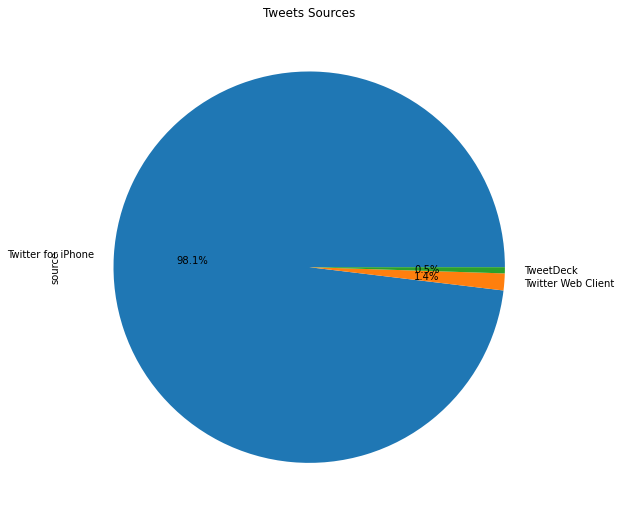

In [57]:
twitter.source.value_counts().plot(kind='pie', figsize=(10,9),autopct='%1.1f%%')
plt.title('Tweets Sources');

3. What was the most favorite dog stage recorded?

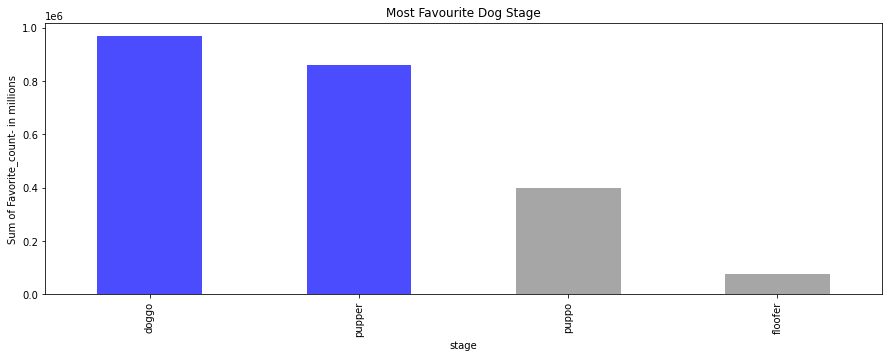

In [58]:
fav_stage=twitter.groupby('stage')['favorite_count'].sum().sort_values(ascending=False)
colors=['blue','blue','grey','grey']
fav_stage.plot(kind='bar', figsize=(15,5), color=colors, alpha=0.7)
plt.title('Most Favourite Dog Stage')
plt.ylabel('Sum of Favorite_count- in millions');

4. What rating level is most popular?

In [59]:
twitter.rating.value_counts().head(1)

12.0/10.0    392
Name: rating, dtype: Int64

5. Which dog breed has the strongest confidence level?

In [60]:
twitter.groupby('dog_breed')['dog_conf'].max().sort_values(ascending=False).head(1)


dog_breed
komondor    0.999956
Name: dog_conf, dtype: float64

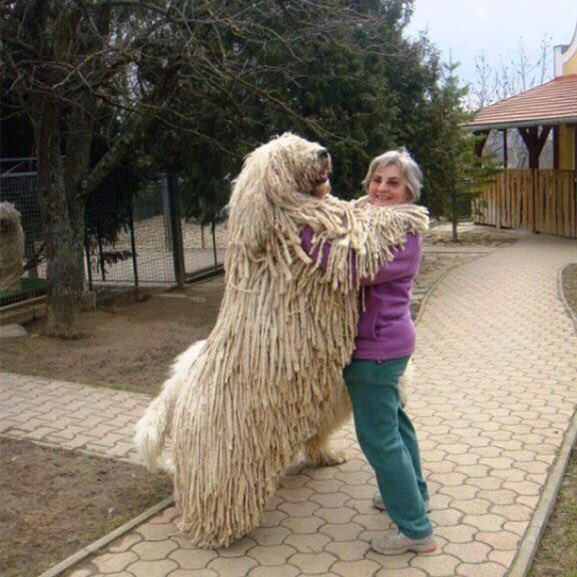

In [61]:
#getting the image url of the dog with the strongest confidence level
twitter.query('dog_conf==0.999956').jpg_url

#loading the image
url= 'https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg'
r=requests.get(url)
i=Image.open(BytesIO(r.content))
i

6. Is there a correlation between retweet_count and favourite_count? If there is, what type of correlation is it?

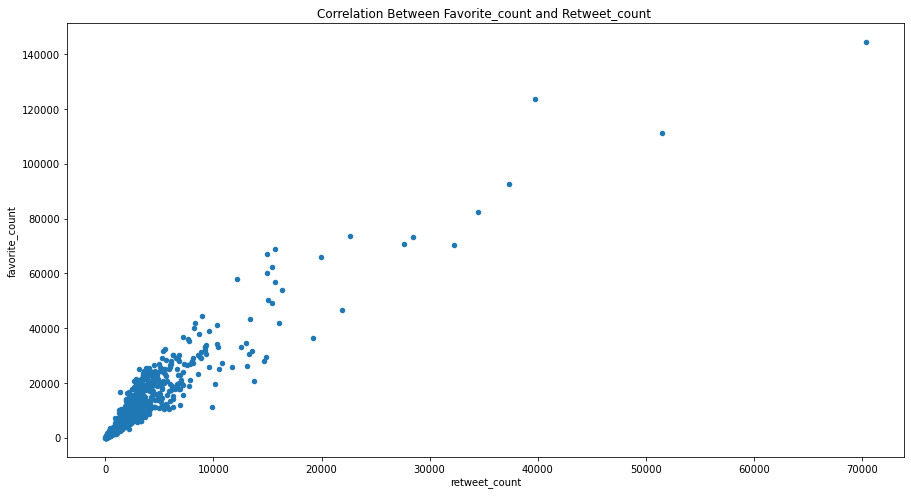

In [62]:
twitter.plot(x='retweet_count', y='favorite_count', kind='scatter',figsize=(15,8))
plt.title('Correlation Between Favorite_count and Retweet_count ');

- This shows a positive correlation between retweet and favorite counts 

7. Most twitter handlers named their dogs?

In [63]:
twitter.name.value_counts().sort_values(ascending=False).head()

Lucy      9
Cooper    9
Tucker    9
Penny     8
Oliver    8
Name: name, dtype: int64

8. On which day of the week did tweets gather the most engagement based on the highest average retweet_count and favorite_count?

In [64]:
#adding a new column to twitter,'weekday' that will show days of the week from 'timestamp'
twitter['weekday']= twitter.timestamp.dt.dayofweek
#replacing the integer values with appropriate weekday values
weekdays={0:'monday',1:'tuesday',2:'wednesday',3:'thursday',4:'friday', 5:'saturday', 6:'sunday'}
twitter['weekday']=twitter['weekday'].replace(weekdays)


#getting the weekday with the highest average retweet_count and favourite_count
days=twitter.groupby('weekday')[['retweet_count','favorite_count']].mean().sort_values(by='retweet_count',ascending=False)
days

,retweet_count,favorite_count
weekday,,
wednesday,2333.479821,8360.112108
tuesday,2151.223176,7895.364807
saturday,2133.818653,7423.383420
sunday,2120.816038,7593.679245
friday,2094.981818,7395.640909
monday,2075.591078,7284.464684
thursday,1829.956140,6765.385965


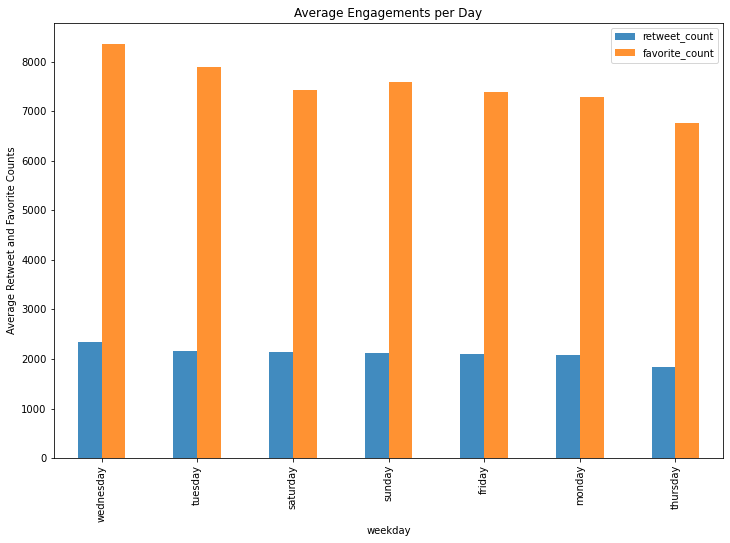

In [65]:
days.plot(kind='bar',alpha=0.85, figsize=(12,8))
plt.title('Average Engagements per Day')
plt.ylabel('Average Retweet and Favorite Counts');